In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("season-1819.csv")
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,2.06,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1.71,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,3.18,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,1.76,18,-0.75,2.26,2.18,1.74,1.71,2.18,3.26,3.85
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,1.81,18,-0.25,1.76,1.74,2.23,2.14,2.32,3.21,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,18/05/2019,Levante,Ath Madrid,2,2,D,2,0,H,...,2.23,18,0.50,1.91,1.87,2.04,1.99,4.34,4.10,1.81
376,SP1,18/05/2019,Sevilla,Ath Bilbao,2,0,H,1,0,H,...,2.08,19,-1.00,2.70,2.60,1.60,1.53,2.17,3.08,4.15
377,SP1,18/05/2019,Valladolid,Valencia,0,2,A,0,1,A,...,2.25,20,1.50,1.78,1.74,2.20,2.13,8.01,5.13,1.40
378,SP1,19/05/2019,Eibar,Barcelona,2,2,D,2,2,D,...,2.65,19,0.50,2.03,1.98,1.92,1.88,4.96,4.55,1.65


In [58]:
df.columns


Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
       'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [60]:
# Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. 
# Estandaritza els atributs numèrics amb StandardScaler.

df3= df[['Div', 'Date', 'HomeTeam','AwayTeam', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA']].copy()
df3 = df3.rename(columns={'BbAH': 'partits_jugats','BbAHh':'gols_casa_fora',
                         'BbMxAHH': 'mitjana_gols_casa','BbAvAHH': 'mitjana_gols_fora', 'BbMxAHA': 'mitjana_gols_temp_ant_casa',
                         'BbAvAHA': 'mitjana_gols_temp_ant_fora'} )
df3

,Div,Date,HomeTeam,AwayTeam,partits_jugats,gols_casa_fora,mitjana_gols_casa,mitjana_gols_fora,mitjana_gols_temp_ant_casa,mitjana_gols_temp_ant_fora
0,SP1,17/08/2018,Betis,Levante,20,-0.75,1.89,1.85,2.07,2.00
1,SP1,17/08/2018,Girona,Valladolid,20,-0.75,2.06,2.01,1.90,1.85
2,SP1,18/08/2018,Barcelona,Alaves,19,-2.50,1.95,1.91,2.00,1.95
3,SP1,18/08/2018,Celta,Espanol,18,-0.75,2.26,2.18,1.74,1.71
4,SP1,18/08/2018,Villarreal,Sociedad,18,-0.25,1.76,1.74,2.23,2.14
...,...,...,...,...,...,...,...,...,...,...
375,SP1,18/05/2019,Levante,Ath Madrid,18,0.50,1.91,1.87,2.04,1.99
376,SP1,18/05/2019,Sevilla,Ath Bilbao,19,-1.00,2.70,2.60,1.60,1.53
377,SP1,18/05/2019,Valladolid,Valencia,20,1.50,1.78,1.74,2.20,2.13
378,SP1,19/05/2019,Eibar,Barcelona,19,0.50,2.03,1.98,1.92,1.88


In [61]:
# Columna Target
targ_column = ['Date']
print(f'The target column is: {targ_column}')

# Columnes Numèriques
num_columns = list(df3.select_dtypes('number').columns)
print(f"Numerical columns are: {num_columns}")

# Columnes Categòriques (= les que no són numèriques i que no són el target)
cat_columns = list(set(df3.columns) - set(num_columns) - set(targ_column))
print(f"Categorical columns are: {cat_columns}")

The target column is: ['Date']
Numerical columns are: ['partits_jugats', 'gols_casa_fora', 'mitjana_gols_casa', 'mitjana_gols_fora', 'mitjana_gols_temp_ant_casa', 'mitjana_gols_temp_ant_fora']
Categorical columns are: ['AwayTeam', 'Div', 'HomeTeam']


                  0             1             2             3             4
count  3.800000e+02  3.800000e+02  3.800000e+02  3.800000e+02  3.800000e+02
mean  -8.472755e-18  5.079270e-16 -6.274221e-16  2.414005e-16  1.368788e-15
std    1.001318e+00  1.001318e+00  1.001318e+00  1.001318e+00  1.001318e+00
min   -3.086977e+00 -1.889708e+00 -1.956498e+00 -2.258154e+00 -2.303907e+00
25%   -7.093711e-01 -7.833712e-01 -7.950867e-01 -7.431495e-01 -7.519530e-01
50%    1.822310e-01 -9.667902e-02 -8.994391e-02 -9.386192e-02 -1.129131e-01
75%    7.766323e-01  5.518635e-01  5.737199e-01  6.852831e-01  7.087097e-01
max    2.857037e+00  4.633867e+00  4.265350e+00  3.801863e+00  3.447452e+00


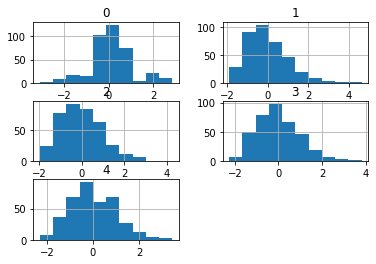

In [62]:
# visualize a standard scaler transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

df4= df3[['gols_casa_fora', 'mitjana_gols_casa', 'mitjana_gols_fora', 'mitjana_gols_temp_ant_casa',
      'mitjana_gols_temp_ant_fora']].copy()
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
df4 = trans.fit_transform(df4)
# convert the array back to a dataframe
df4 = DataFrame(df4)
# summarize
print(df4.describe())
# histograms of the variables
df4.hist()
pyplot.show()

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df4)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['gols_casa_fora', 'mitjana_gols_casa', 'mitjana_gols_fora', 'mitjana_gols_temp_ant_casa',
      'mitjana_gols_temp_ant_fora'])

principalDf

,gols_casa_fora,mitjana_gols_casa,mitjana_gols_fora,mitjana_gols_temp_ant_casa,mitjana_gols_temp_ant_fora
0,-0.905016,0.626190,-0.180066,-0.019585,0.041740
1,0.430162,0.337630,-0.245093,-0.020100,0.007891
2,0.030346,2.550732,-0.136864,-0.062111,-0.020544
3,1.797625,0.037704,-0.184090,0.018403,-0.040041
4,-2.147548,0.280960,-0.007732,-0.061195,0.073106
...,...,...,...,...,...
375,-1.057622,-0.860060,-0.249844,-0.004502,-0.008577
376,4.227370,-0.226778,0.809627,-0.108891,0.037079
377,-2.467119,-1.774476,-0.135063,0.024790,0.025127
378,-0.111865,-1.063701,-0.309260,0.006089,-0.018734


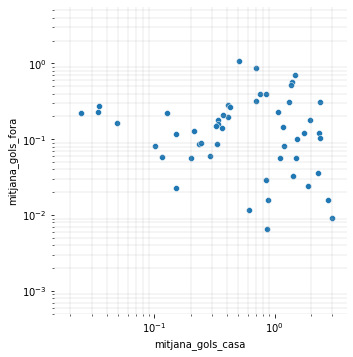

In [76]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=principalDf,
    x="mitjana_gols_casa", y="mitjana_gols_fora",
    
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)